# DATA.STAT.840 Statistical Methods for Text Data Analysis
Exercises for Lecture 2: Basic text processing
Daniel Kusnetsoff

Exercise 2.1: Data acquisition - Building a better web crawler.
The web crawler code shown on Lecture 2 is poor in at least two respects:
1. It can crawl the same page multiple times, if a link on a later crawled page points to the
already-crawled page.
2. It inserts all links from each page in order as pages to be crawled. If some page contains
thousands of links, the crawling will crawl those first and may never get to the links from
the next page, especially if the total number of pages are limited.
Suggest how to create an improved web crawler that does not have these problems. Provide in your
answer the improved code, either as pseudocode or as real code in Python or in another
programming language. The code must be detailed enough to show how the problem is solved using
the data types and structures of the language you have chosen.

1. We can add a condition that checks if the page has already been crawled. This way we can make sure we only crawl the pages once. This could also be done by storing the crawled urls to a container that only accepts unique element from the beginning.

2. We can limit the amount of links returned by each of the pages to a specific value such as 3 by adding the max amount of returned links.

In [1]:
import requests
import bs4
import re
import numpy as np

In [2]:
def getpageurls(webpage_parsed):
    # Find elements that are hyperlinks
    pagelinkelements=webpage_parsed.find_all('a')
    pageurls=[];
    for pagelink in pagelinkelements:
        pageurl_isok=1
        try:
            pageurl=pagelink['href']
        except:
            pageurl_isok=0
        if pageurl_isok==1:
            # Check that the url does NOT contain these strings
            if (pageurl.find('.pdf')!=-1)|(pageurl.find('.ps')!=-1):
                pageurl_isok=0
            # Check that the url DOES contain these strings
            if (pageurl.find('http')==-1)|(pageurl.find('.fi')==-1):
                pageurl_isok=0
        if pageurl_isok==1:
            pageurls.append(pageurl)
    return(pageurls)

    #print(pageurls)




In [3]:
def getpagetext(parsedpage):
    # Remove HTML elements that are scripts
    scriptelements=parsedpage.find_all('script')
    # Concatenate the text content from all table cells
    for scriptelement in scriptelements:
        # Extract this script element from the page.
        # This changes the page given to this function!
        scriptelement.extract()
    pagetext=parsedpage.get_text()
    return(pagetext)

In [4]:
def basicwebcrawler(seedpage_url,maxpages):
    # Store URLs crawled and their text content
    num_pages_crawled=0
    crawled_urls=[]
    crawled_texts=[]
    # Remaining pages to crawl: start from a seed page URL
    pagestocrawl=[seedpage_url]
    # Process remaining pages until a desired number
    # of pages have been found
    while (num_pages_crawled<maxpages)&(len(pagestocrawl)>0):
        # Retrieve the topmost remaining page and parse it
        pagetocrawl_url=pagestocrawl[0]
        print('Getting page:')
        print(pagetocrawl_url)
        pagetocrawl_html=requests.get(pagetocrawl_url)
        pagetocrawl_parsed=bs4.BeautifulSoup(pagetocrawl_html.content,'html.parser')
        # Get the text and URLs of the page
        pagetocrawl_text=getpagetext(pagetocrawl_parsed)
        pagetocrawl_urls=getpageurls(pagetocrawl_parsed)
        # Store the URL and content of the processed page
        
        # Checking if the URl already has been crawled
        if pagetocrawl_urls not in crawled_urls:
            num_pages_crawled=num_pages_crawled+1
            crawled_urls.append(pagetocrawl_url)
            crawled_texts.append(pagetocrawl_text)
            
        # Remove the processed page from remaining pages,
        # add new URLs
            pagestocrawl=pagestocrawl[1:len(pagestocrawl)]
            pagestocrawl.extend(pagetocrawl_urls)
    return(crawled_urls,crawled_texts)

mycrawled_urls_and_texts=basicwebcrawler('https://www.sis.uta.fi/~tojape/',15)
mycrawled_urls=mycrawled_urls_and_texts[0]
mycrawled_texts=mycrawled_urls_and_texts[1]

Getting page:
https://www.sis.uta.fi/~tojape/
Getting page:
https://www.tuni.fi/en
Getting page:
https://www.tuni.fi/en/about-us/faculty-information-technology-and-communication-sciences
Getting page:
https://www.tuni.fi/en/about-us/computing-sciences
Getting page:
http://cs.aalto.fi/en/
Getting page:
http://www.cis.hut.fi/projects/mi
Getting page:
http://users.ics.aalto.fi/jtpelto/
Getting page:
http://research.ics.aalto.fi/coin/
Getting page:
https://www.tuni.fi/studentsguide/curriculum/degree-programmes/uta-tohjelma-1717?year=2019
Getting page:
https://www.tuni.fi/en/study-with-us/computing-sciences-data-science?navref=curated--list
Getting page:
https://www.tuni.fi/en/study-with-us/computing-sciences-statistical-data-analytics?navref=curated--list
Getting page:
https://www.tuni.fi/studentsguide/curriculum/course-units/otm-d42bf3fb-ecd7-43ee-919e-3a18e0b7d885?year=2020&q=null
Getting page:
https://www.tuni.fi/studentsguide/curriculum/course-units/otm-386280c0-c76b-4837-b4e3-61a9d531

# Ex 2.2

In [5]:

def top_gutenberg_ebooks(seed_page_url, top_k):
    ebook_titles=[]
    amount_books_downloaded=0
    texts_downloaded=[]
    ebook_addresses=[]
    url_to_download= "https://www.gutenberg.org/files/"
    
    seed_page_parsed = requests.get(seed_page_url)
    h2_tag=bs4.BeautifulSoup(seed_page_parsed.content, 'html.parser').find(id='books-last30')
    ol_tag = h2_tag.next_sibling.next_sibling
    for a_tag in ol_tag.find_all('a'):
        # find matching pattern for ebook name
        name_match = re.match(r'(.*)(\(\d+\))', a_tag.text)
        ebook_name = name_match.group(1).strip()
        
        # find matching pattern for ebook id
        id_match = re.match(r'/ebooks/(\d+)', a_tag.get('href'))
        ebook_id = id_match.group(1)
        ebook_url = url_to_download + ebook_id + '/' + ebook_id + '-0.txt'
        
        # checking book is not already downloaded using url
        if (ebook_url not in ebook_addresses) & (amount_books_downloaded < top_k):
            print('Downloading text file from:')
            print(ebook_url)
            ebook_page = requests.get(ebook_url)
            parsed_page = bs4.BeautifulSoup(ebook_page.content, 'html.parser')
            
            # get text from dowloaded ebook
            ebook_text = getpagetext(parsed_page)
            start_index = ebook_text.find('*** START OF THE PROJECT GUTENBERG EBOOK')
            end_index = ebook_text.find('*** END OF THE PROJECT GUTENBERG EBOOK')
            ebook_text = ebook_text[start_index:end_index]
            
            # remove leading and trailing whitespaces
            ebook_text = ebook_text.strip()
            ebook_text = ' '.join(ebook_text.split())
            
            # store book content
            texts_downloaded.append(ebook_text)
            ebook_addresses.append(ebook_url)
            ebook_titles.append(ebook_name)
            amount_books_downloaded += 1
            
    return(texts_downloaded, ebook_titles, ebook_addresses, amount_books_downloaded)

In [6]:
texts_downloaded, ebook_titles, ebook_addresses, amount_books_downloaded =top_gutenberg_ebooks('https://www.gutenberg.org/browse/scores/top', 20)

https://www.gutenberg.org/files/2641/2641-0.txt
https://www.gutenberg.org/files/145/145-0.txt
https://www.gutenberg.org/files/37106/37106-0.txt
https://www.gutenberg.org/files/16389/16389-0.txt
https://www.gutenberg.org/files/67979/67979-0.txt
https://www.gutenberg.org/files/394/394-0.txt
https://www.gutenberg.org/files/1342/1342-0.txt
https://www.gutenberg.org/files/84/84-0.txt
https://www.gutenberg.org/files/1952/1952-0.txt
https://www.gutenberg.org/files/1661/1661-0.txt
https://www.gutenberg.org/files/345/345-0.txt
https://www.gutenberg.org/files/11/11-0.txt
https://www.gutenberg.org/files/25344/25344-0.txt
https://www.gutenberg.org/files/2701/2701-0.txt
https://www.gutenberg.org/files/174/174-0.txt
https://www.gutenberg.org/files/1080/1080-0.txt
https://www.gutenberg.org/files/98/98-0.txt
https://www.gutenberg.org/files/43/43-0.txt
https://www.gutenberg.org/files/64317/64317-0.txt
https://www.gutenberg.org/files/2542/2542-0.txt


In [7]:
ebook_titles, ebook_addresses, amount_books_downloaded

(['A Room with a View by E. M.  Forster',
  'Middlemarch by George Eliot',
  'Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott',
  'The Enchanted April by Elizabeth Von Arnim',
  'The Blue Castle: a novel by L. M.  Montgomery',
  'Cranford by Elizabeth Cleghorn Gaskell',
  'Pride and Prejudice by Jane Austen',
  'Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley',
  'The Yellow Wallpaper by Charlotte Perkins Gilman',
  'The Adventures of Sherlock Holmes by Arthur Conan Doyle',
  'Dracula by Bram Stoker',
  "Alice's Adventures in Wonderland by Lewis Carroll",
  'The Scarlet Letter by Nathaniel Hawthorne',
  'Moby Dick; Or, The Whale by Herman Melville',
  'The Picture of Dorian Gray by Oscar Wilde',
  'A Modest Proposal by Jonathan Swift',
  'A Tale of Two Cities by Charles Dickens',
  'The Strange Case of Dr. Jekyll and Mr. Hyde by Robert Louis Stevenson',
  'The Great Gatsby by F. Scott  Fitzgerald',
  "A Doll's House : a play by Henrik Ibsen"],
 ['ht

Ex 2.2 C

In [8]:
#%% Tokenize loaded texts and change them to NLTK format
import nltk

mycrawled_nltktexts=[]
for k in range(len(texts_downloaded)):
    temp_tokenizedtext=nltk.word_tokenize(texts_downloaded[k])
    temp_nltktext=nltk.Text(temp_tokenizedtext)
    mycrawled_nltktexts.append(temp_nltktext)

In [9]:
mycrawled_nltktexts[19]

<Text: *** START OF THE PROJECT GUTENBERG EBOOK A...>

In [10]:
mycrawled_lowercasetexts = []
for k in range(len(mycrawled_nltktexts)):
    temp_lowercasetext = []
    for l in range(len(mycrawled_nltktexts[k])):
        lowercaseword = mycrawled_nltktexts[k][l].lower()
        temp_lowercasetext.append(lowercaseword)
    temp_lowercasetest = nltk.Text(temp_lowercasetext)
    mycrawled_lowercasetexts.append(temp_lowercasetext)    




In [11]:
mycrawled_lowercasetexts[19][123]

'’'

In [12]:
#POS
def tagtowordnet(postag):
    wordnettag=-1
    if postag[0]=='N':
        wordnettag='n'
    elif postag[0]=='V':
        wordnettag='v'
    elif postag[0]=='J':
        wordnettag='a'
    elif postag[0]=='R':
        wordnettag='r'
    return(wordnettag)

In [13]:
# Download wordnet resource if you do not have it already
nltk.download('wordnet')
# Download tagger resource if you do not have it already
nltk.download('averaged_perceptron_tagger')

lemmatizer=nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\danie\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [14]:

def lemmatizetext(nltktexttolemmatize):
    # Tag the text with POS tags
    taggedtext=nltk.pos_tag(nltktexttolemmatize)
    # Lemmatize each word text
    lemmatizedtext=[]
    for l in range(len(taggedtext)):
        # Lemmatize a word using the WordNet converted POS tag
        wordtolemmatize=taggedtext[l][0]
        wordnettag=tagtowordnet(taggedtext[l][1])
        if wordnettag!=-1:
            lemmatizedword=lemmatizer.lemmatize(wordtolemmatize,wordnettag)
        else:
            lemmatizedword=wordtolemmatize
        # Store the lemmatized word
        lemmatizedtext.append(lemmatizedword)
    return(lemmatizedtext)

mycrawled_lemmatizedtexts=[]
for k in range(len(mycrawled_lowercasetexts)):
    lemmatizedtext=lemmatizetext(mycrawled_lowercasetexts[k])
    lemmatizedtext=nltk.Text(lemmatizedtext)
    mycrawled_lemmatizedtexts.append(lemmatizedtext)

In [15]:
len(mycrawled_lemmatizedtexts)

20

Ex 2.2 D

In [16]:
import numpy as np

myvocabularies=[]
myindices_in_vocabularies=[]
# Find the vocabulary of each document
for k in range(len(mycrawled_lemmatizedtexts)):
    # Get unique words and where they occur
    temptext=mycrawled_lemmatizedtexts[k]
    uniqueresults=np.unique(temptext,return_inverse=True)
    uniquewords=uniqueresults[0]
    wordindices=uniqueresults[1]
    # Store the vocabulary and indices of document words in it
    myvocabularies.append(uniquewords)
    myindices_in_vocabularies.append(wordindices)
myvocabularies[0]
    

array(['!', '(', ')', ..., '’', '“', '”'], dtype='<U22')

In [17]:
len(myvocabularies)


20

In [18]:
tempvocabulary=[]
for k in range(len(mycrawled_lemmatizedtexts)):
    tempvocabulary.extend(myvocabularies[k])
    
# Find the unique elements among all vocabularies
uniqueresults=np.unique(tempvocabulary,return_inverse=True)
unifiedvocabulary=uniqueresults[0]
wordindices=uniqueresults[1]




In [19]:
len(unifiedvocabulary)

43984

In [20]:
# Translate previous indices to the unified vocabulary.
# Must keep track where each vocabulary started in
# the concatenated one.
vocabularystart=0
myindices_in_unifiedvocabulary=[]
for k in range(len(mycrawled_lemmatizedtexts)):
    # In order to shift word indices, we must temporarily
    # change their data type to a Numpy array
    tempindices=np.array(myindices_in_vocabularies[k])
    tempindices=tempindices+vocabularystart
    tempindices=wordindices[tempindices]
    myindices_in_unifiedvocabulary.append(tempindices)
    vocabularystart=vocabularystart+len(myvocabularies[k])

In [21]:
len(unifiedvocabulary)

43984

In [22]:
myindices_in_unifiedvocabulary[1][1000:1050]

array([15759, 18184, 28792, 16071,   180, 42228,  6286, 37691, 34153,
       26640, 30077, 14203, 16420, 18184, 37691, 19706, 26640,  1492,
       14652, 30516, 15759, 37691,  4875,   180, 43809, 15759, 26849,
       26640, 27177, 12660, 29033,   180, 43729,  1492, 27689, 26640,
       38387, 43980, 32373, 25879,   188, 33807,  4344, 40731, 35339,
       26640,  3431,  4344, 31278,  7814], dtype=int64)

In [23]:
unifiedvocabulary[myindices_in_unifiedvocabulary[1][1000:1050]]

array(['from', 'her', 'plain', 'garment', ',', 'which', 'by', 'the',
       'side', 'of', 'provincial', 'fashion', 'give', 'her', 'the',
       'impressiveness', 'of', 'a', 'fine', 'quotation', 'from', 'the',
       'bible', ',', '—or', 'from', 'one', 'of', 'our', 'elder', 'poet',
       ',', '—in', 'a', 'paragraph', 'of', 'to-day', '’', 's',
       'newspaper', '.', 'she', 'be', 'usually', 'speak', 'of', 'as',
       'be', 'remarkably', 'clever'], dtype='<U54')

In [24]:
unifiedvocabulary_totaloccurrencecounts=np.zeros((len(unifiedvocabulary),1))
unifiedvocabulary_documentcounts=np.zeros((len(unifiedvocabulary),1))
unifiedvocabulary_meancounts=np.zeros((len(unifiedvocabulary),1))
unifiedvocabulary_countvariances=np.zeros((len(unifiedvocabulary),1))

In [25]:
# First pass: count occurrences
for k in range(len(mycrawled_lemmatizedtexts)):
    print(k)
    occurrencecounts=np.zeros((len(unifiedvocabulary),1))
    for l in range(len(myindices_in_unifiedvocabulary[k])):
        occurrencecounts[myindices_in_unifiedvocabulary[k][l]]= \
            occurrencecounts[myindices_in_unifiedvocabulary[k][l]]+1
    unifiedvocabulary_totaloccurrencecounts= \
        unifiedvocabulary_totaloccurrencecounts+occurrencecounts
    unifiedvocabulary_documentcounts= \
        unifiedvocabulary_documentcounts+(occurrencecounts>0)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [26]:
# Mean occurrence counts over documents
unifiedvocabulary_meancounts= \
    unifiedvocabulary_totaloccurrencecounts/len(mycrawled_lemmatizedtexts)

In [27]:
# Second pass to count variances
for k in range(len(mycrawled_lemmatizedtexts)):
    print(k)
    occurrencecounts=np.zeros((len(unifiedvocabulary),1))
    for l in range(len(myindices_in_unifiedvocabulary[k])):
        occurrencecounts[myindices_in_unifiedvocabulary[k][l]]= \
            occurrencecounts[myindices_in_unifiedvocabulary[k][l]]+1
    unifiedvocabulary_countvariances=unifiedvocabulary_countvariances+ \
        (occurrencecounts-unifiedvocabulary_meancounts)**2
unifiedvocabulary_countvariances= \
    unifiedvocabulary_countvariances/(len(mycrawled_lemmatizedtexts)-1)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [28]:
#%% Inspect frequent words
# Sort words by largest total (or mean) occurrence count
highest_totaloccurrences_indices=np.argsort(\
    -1*unifiedvocabulary_totaloccurrencecounts,axis=0)
print(np.squeeze(unifiedvocabulary[\
    highest_totaloccurrences_indices[1:100]]))
print(np.squeeze(\
    unifiedvocabulary_totaloccurrencecounts[\
    highest_totaloccurrences_indices[1:100]]))

['the' '.' 'be' 'and' 'of' 'to' 'a' 'i' 'have' 'in' 'that' '“' '”' 'it'
 'he' 'his' '’' 'you' 'her' ';' 'with' 'she' 'as' 'not' 'for' 'but' 'at'
 'say' 'on' 'my' 'do' 's' 'him' '?' '!' 'all' 'me' 'so' 'this' 'which'
 'by' 'from' 'there' 'would' 'one' 'they' 'go' 'what' 'if' 'no' 'when'
 'we' 'come' 'an' 'know' 'mr.' 'or' 'could' '--' 'will' 'who' 'out' 'make'
 'them' 'see' 'up' 'look' 'think' 'more' 'very' 'now' 'some' 'into' 'then'
 't' 'your' 'like' 'their' 'take' 'man' 'can' 'about' 'little' ':' 'time'
 'than' 'any' '``' "''" 'only' 'good' 'must' 'should' 'get' 'before'
 'well' 'tell' 'never' 'seem']
[84626. 71673. 66125. 53248. 46971. 46751. 36244. 31774. 29299. 28203.
 24565. 23738. 22737. 22481. 21617. 17249. 16722. 16426. 16137. 15505.
 14692. 14480. 14220. 13290. 13019. 11944. 11290. 10403.  9866.  9304.
  9031.  8933.  8811.  8801.  8360.  7939.  7881.  7352.  7244.  7225.
  6905.  6560.  6390.  6053.  5903.  5815.  5775.  5746.  5650.  5591.
  5441.  5315.  4976.  4924.  4726

In [29]:
# Sort words by largest total document count
highest_documentoccurrences_indices=np.argsort(\
    -1*unifiedvocabulary_documentcounts,axis=0)
print(np.squeeze(unifiedvocabulary[\
    highest_documentoccurrences_indices[1:100]]))
print(np.squeeze(\
    unifiedvocabulary_documentcounts[\
    highest_documentoccurrences_indices[1:100]]))

['deal' 'dear' 'mean' 'me' 'may' 'matter' 'many' 'manner' 'man' 'make'
 'love' 'day' 'very' 'long' 'little' 'like' 'life' 'let' 'less' 'leave'
 'least' 'last' 'know' 'kind' 'look' 'walk' 'use' 'might' 'a' 'off' 'of'
 'now' 'nothing' 'not' 'nor' 'could' 'no' 'course' 'new' 'us' 'never'
 'myself' 'my' 'must' 'much' 'move' 'most' 'more' 'month' 'moment' 'up'
 'upon' 'near' 'just' 'do' 'want' 'home' 'will' 'his' 'him' 'high' 'her'
 'even' 'help' 'ever' 'every' 'with' 'hop' 'heart' 'head' 'he' 'have'
 'except' 'woman' 'expect' 'work' 'world' 'half' 'gutenberg' 'would'
 'without' 'hope' 'house' 'how' 'its' 'it' 'into' 'interest' 'way' 'dress'
 'we' 'instead' 'well' 'easy' 'eat' 'ebook' 'in' 'what' 'when']
[19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19.
 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19.
 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19.
 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19. 19.

In [30]:
# Sort by largest variance of count over documents
highest_countvariances_indices=np.argsort(\
    -1*unifiedvocabulary_countvariances,axis=0)
print(np.squeeze(unifiedvocabulary[\
    highest_countvariances_indices[1:100]]))
print(np.squeeze(\
    unifiedvocabulary_countvariances[\
    highest_countvariances_indices[1:100]]))

['the' 'be' '.' 'to' 'and' 'of' 'a' 'have' 'i' 'in' '“' '”' 'that' 'he'
 ';' 'his' '’' 'her' 'it' 'you' 'she' 'with' 'not' 'as' 'for' 'say' 's'
 'but' 'at' 'him' 'on' 'my' '--' 'which' 'mr.' '``' "''" '!' 'do' 'all'
 'me' 'this' 'by' 'we' '?' 'would' 'from' 'so' 'whale' 'there' 'will' 'if'
 'go' 'an' 'no' 'what' 'mrs.' 'when' 'one' ':' 'make' 'they' 'valancy'
 'know' 'come' 'who' 'lydgate' 'more' 'miss' 'could' 'dorothea' 'or'
 'think' 't' 'some' 'now' "'s" 'see' 'like' 'out' 'than' 'look' 'about'
 'your' 'their' 'any' 'them' 'up' 'man' 'then' 'very' 'take' 'should'
 'good' 'into' 'can' '_' 'nora' 'upon']
[15233457.27368421  9392633.67105263  7757209.1868421   5277607.62894737
  5084184.04210526  5054371.94473684  2900684.8         2094703.83947368
  1878074.85263158  1834256.97631579  1647867.14736842  1565757.18684211
  1440953.88157895  1328645.92368421   985635.35526316   941668.26052632
   897624.2          819733.08157895   770040.15526316   628444.53684211
   594207.89473684   5

# Ex 2.3 Zipf's law

In [31]:
import matplotlib.pyplot as plt

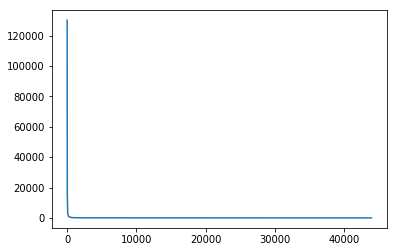

In [32]:
myfigure, myaxes = plt.subplots();
# Plot the sorted occurrence counts of the words against their ranks
horizontalpositions=range(len(unifiedvocabulary))
verticalpositions=np.squeeze(unifiedvocabulary_totaloccurrencecounts[\
    highest_totaloccurrences_indices])
myaxes.plot(horizontalpositions,verticalpositions);

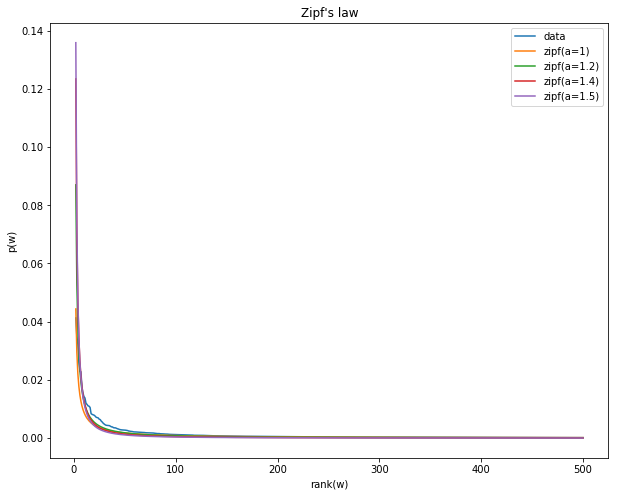

In [33]:
### 
horizontal_points = np.arange(1, len(unifiedvocabulary)+1)
word_frequencies = np.squeeze(unifiedvocabulary_totaloccurrencecounts[highest_totaloccurrences_indices])
vertical_points = word_frequencies / sum(word_frequencies)

v1 = 1
v2 = 1.2
v3 = 1.4
v4 = 1.5
zipf_freq1 = np.power(horizontal_points.astype(float), -1 * v1)
zipf_points1 = zipf_freq1 / sum(zipf_freq1)

zipf_freq2 = np.power(horizontal_points.astype(float), -1 * v2)
zipf_points2 = zipf_freq2 / sum(zipf_freq2)

zipf_freq3 = np.power(horizontal_points.astype(float), -1 * v3)
zipf_points3 = zipf_freq3 / sum(zipf_freq3)

zipf_freq4 = np.power(horizontal_points.astype(float), -1 * v4)
zipf_points4 = zipf_freq4 / sum(zipf_freq4)

plt.figure(figsize=(10, 8))
plt.title('Zipf\'s law')
plt.plot(horizontal_points[1:500], vertical_points[1:500])

plt.plot(horizontal_points[1:500], zipf_points1[1:500])
plt.plot(horizontal_points[1:500], zipf_points2[1:500])
plt.plot(horizontal_points[1:500], zipf_points3[1:500])
plt.plot(horizontal_points[1:500], zipf_points4[1:500])
#plt.plot(horizontalpositions[1:43984],verticalpositions[1:43984]);

plt.xlabel('rank(w)')
plt.ylabel('p(w)')
plt.legend(['data', 'zipf(a=1)', 'zipf(a=1.2)',
            'zipf(a=1.4)', 'zipf(a=1.5)'], loc='best')
plt.show()

The best choice for Zipf's law is according to the grapf around 1.4-1.5 as it follows the expected pattern as wel as possible.